In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
s_model_path = "S_magnitude_models_evid_C1.0_e0.1_9features"
s_train_evids = np.loadtxt(f"{s_model_path}/train_evids.txt")
s_test_evids = np.loadtxt(f"{s_model_path}/test_evids.txt")
s_test_summary_df = pd.read_csv(f"{s_model_path}/combined_test_summary_df.csv")
assert s_test_summary_df.event_identifier.unique().shape == s_test_evids.shape

In [3]:
p_model_path = "../P_station_analysis/P_magnitude_models_evid_C1.0_e0.1_9features"
p_train_evids = np.loadtxt(f"{p_model_path}/train_evids.txt")
p_test_evids = np.loadtxt(f"{p_model_path}/test_evids.txt")
p_test_summary_df = pd.read_csv(f"{p_model_path}/combined_test_summary_df.csv")
assert p_test_summary_df.event_identifier.unique().shape == p_test_evids.shape

In [4]:
p_test_summary_df["phase"] = np.full(len(p_test_summary_df), "P")
s_test_summary_df["phase"] = np.full(len(s_test_summary_df), "S")

In [5]:
combined_df = pd.concat([p_test_summary_df, s_test_summary_df])

In [9]:
network_phase_avg_df = pd.merge(combined_df.groupby("event_identifier").predicted_magnitude.mean().reset_index(), 
         combined_df[["event_identifier", "magnitude", "phase"]].drop_duplicates(), how="inner")

In [10]:
network_phase_avg_df

,event_identifier,predicted_magnitude,magnitude,phase
0,60001357,2.005212,1.97,P
1,60001357,2.005212,1.97,S
2,60001372,2.413377,2.52,P
3,60001382,2.686757,3.16,P
4,60001382,2.686757,3.16,S
...,...,...,...,...
2133,60469912,1.002860,1.04,P
2134,60470442,1.783525,1.92,P
2135,60471327,1.455732,1.79,P
2136,60472267,1.388605,1.11,S


In [19]:
combined_station_r2 = combined_df.groupby("station").apply(lambda x: r2_score(x["magnitude"], x["predicted_magnitude"])).reset_index()
combined_station_r2

,station,0
0,B206,0.711603
1,B207,0.838154
2,B208,0.780204
3,B944,0.692700
4,B945,0.788546
5,B950,0.541660
6,FLWY,0.797287
7,H17A,0.809369
8,LKWY,0.828487
9,MCID,0.852038


In [20]:
combined_station_r2[0].mean()

0.8082932001156816

0.9060088847442389


Text(0.5, 3.0, '$r^2$= 0.906')

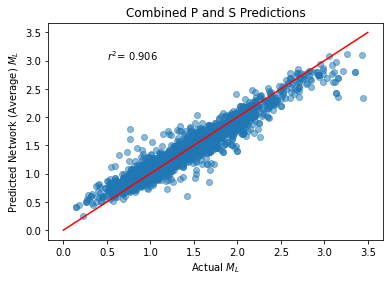

In [15]:
plt.scatter(network_phase_avg_df["magnitude"], network_phase_avg_df["predicted_magnitude"], alpha=0.5)
plt.plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
# r2_score(y_true, y_pred)
network_avg_r2 = r2_score(network_phase_avg_df["magnitude"], network_phase_avg_df["predicted_magnitude"])
print(network_avg_r2)
plt.xlabel(r"Actual $M_L$")
plt.ylabel(r"Predicted Network (Average) $M_L$")
plt.title("Combined P and S Predictions")
plt.text(0.5, 3.0, f"$r^2$={network_avg_r2: 0.3f}")

In [26]:
combined_df_sstats = combined_df[np.isin(combined_df.station, s_test_summary_df.station.unique())]

In [28]:
combined_station_sstats_r2 = combined_df_sstats.groupby("station").apply(lambda x: r2_score(x["magnitude"], x["predicted_magnitude"])).reset_index()
print(combined_station_sstats_r2[0].mean())
combined_station_sstats_r2

0.8270352540023185


,station,0
0,B206,0.711603
1,B207,0.838154
2,FLWY,0.797287
3,LKWY,0.828487
4,YDD,0.780880
5,YFT,0.835655
6,YHB,0.888548
7,YHH,0.853719
8,YHL,0.876025
9,YMC,0.823142


In [32]:
combined_df_sstats_P = combined_df_sstats[combined_df_sstats["phase"] == "P"]
combined_station_sstats_P_r2 = combined_df_sstats_P.groupby("station").apply(lambda x: r2_score(x["magnitude"], x["predicted_magnitude"])).reset_index()
print(combined_station_sstats_P_r2[0].mean())
combined_station_sstats_P_r2

0.8260045009254503


,station,0
0,B206,0.738402
1,B207,0.835101
2,FLWY,0.812113
3,LKWY,0.836387
4,YDD,0.789088
5,YFT,0.825327
6,YHB,0.880966
7,YHH,0.848190
8,YHL,0.868358
9,YMC,0.818011


In [37]:
combined_df_sstats_S = combined_df_sstats[combined_df_sstats["phase"] == "S"]
combined_station_sstats_S_r2 = combined_df_sstats_S.groupby("station").apply(lambda x: r2_score(x["magnitude"], x["predicted_magnitude"])).reset_index()
print(combined_station_sstats_S_r2[0].mean())
combined_station_sstats_S_r2

0.8203632549731487


,station,0
0,B206,0.583002
1,B207,0.848043
2,FLWY,0.734322
3,LKWY,0.773588
4,YDD,0.758561
5,YFT,0.868120
6,YHB,0.909557
7,YHH,0.862096
8,YHL,0.910204
9,YMC,0.787537


In [33]:
network_phase_avg_df_sstats = pd.merge(combined_df_sstats.groupby("event_identifier").predicted_magnitude.mean().reset_index(), 
         combined_df_sstats[["event_identifier", "magnitude", "phase"]].drop_duplicates(), how="inner")

In [34]:
network_phase_avg_df_sstats_P = pd.merge(combined_df_sstats_P.groupby("event_identifier").predicted_magnitude.mean().reset_index(), 
         combined_df_sstats_P[["event_identifier", "magnitude", "phase"]].drop_duplicates(), how="inner")

In [38]:
network_phase_avg_df_sstats_S = pd.merge(combined_df_sstats_S.groupby("event_identifier").predicted_magnitude.mean().reset_index(), 
         combined_df_sstats_S[["event_identifier", "magnitude", "phase"]].drop_duplicates(), how="inner")

0.9083707835841408


Text(0.5, 3.0, '$r^2$= 0.908')

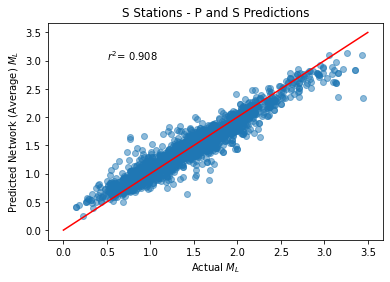

In [40]:
plt.scatter(network_phase_avg_df_sstats["magnitude"], network_phase_avg_df_sstats["predicted_magnitude"], alpha=0.5)
plt.plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
# r2_score(y_true, y_pred)
network_avg_r2 = r2_score(network_phase_avg_df_sstats["magnitude"], network_phase_avg_df_sstats["predicted_magnitude"])
print(network_avg_r2)
plt.xlabel(r"Actual $M_L$")
plt.ylabel(r"Predicted Network (Average) $M_L$")
plt.title("S Stations - P and S Predictions")
plt.text(0.5, 3.0, f"$r^2$={network_avg_r2: 0.3f}")

0.9017953183354924


Text(0.5, 3.0, '$r^2$= 0.902')

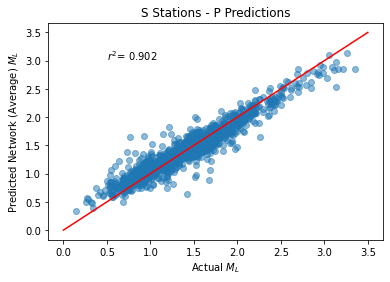

In [41]:
plt.scatter(network_phase_avg_df_sstats_P["magnitude"], network_phase_avg_df_sstats_P["predicted_magnitude"], alpha=0.5)
plt.plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
# r2_score(y_true, y_pred)
network_avg_r2 = r2_score(network_phase_avg_df_sstats_P["magnitude"], network_phase_avg_df_sstats_P["predicted_magnitude"])
print(network_avg_r2)
plt.xlabel(r"Actual $M_L$")
plt.ylabel(r"Predicted Network (Average) $M_L$")
plt.title("S Stations - P Predictions")
plt.text(0.5, 3.0, f"$r^2$={network_avg_r2: 0.3f}")

0.9095890350541243


Text(0.5, 3.0, '$r^2$= 0.910')

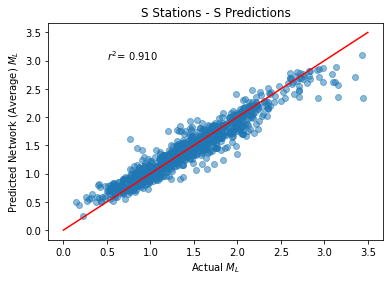

In [42]:
plt.scatter(network_phase_avg_df_sstats_S["magnitude"], network_phase_avg_df_sstats_S["predicted_magnitude"], alpha=0.5)
plt.plot(np.arange(0, 4, 0.5), np.arange(0, 4, 0.5), color="red")
# r2_score(y_true, y_pred)
network_avg_r2 = r2_score(network_phase_avg_df_sstats_S["magnitude"], network_phase_avg_df_sstats_S["predicted_magnitude"])
print(network_avg_r2)
plt.xlabel(r"Actual $M_L$")
plt.ylabel(r"Predicted Network (Average) $M_L$")
plt.title("S Stations - S Predictions")
plt.text(0.5, 3.0, f"$r^2$={network_avg_r2: 0.3f}")